In [1]:
##Downloading the test set

In [2]:
import requests

url = "https://huggingface.co/datasets/sywang/CNNDetection/resolve/main/CNN_synth_testset.zip"
filename = "CNN_synth_testset.zip"

print("Downloading...")
response = requests.get(url, stream=True)

with open(filename, "wb") as f:
    for chunk in response.iter_content(chunk_size=8192):
        if chunk:
            f.write(chunk)

print("Download complete.")


Downloading...


KeyboardInterrupt: 

In [ ]:
##Unzipping the testset
import zipfile

with zipfile.ZipFile("CNN_synth_testset.zip", "r") as zip_ref:
    zip_ref.extractall(".")

print("Unzip complete.")


In [ ]:
import os

os.remove("CNN_synth_testset.zip")
print("ZIP file removed.")


In [ ]:
!pip install py7zr


In [ ]:
import subprocess
import time
from pathlib import Path
from concurrent.futures import ThreadPoolExecutor, as_completed

# URLs to download
base_url = "https://huggingface.co/datasets/sywang/CNNDetection/resolve/main/"
files = [f"progan_train.7z.{str(i).zfill(3)}" for i in range(1, 8)]

def download_file(filename):
    """Download a single file using wget"""
    url = base_url + filename
    print(f"Starting download: {filename}")
    result = subprocess.run(
        ['wget', '-c', url],  # -c allows resume if interrupted
        capture_output=True,
        text=True
    )
    if result.returncode == 0:
        print(f"✓ Completed: {filename}")
        return True
    else:
        print(f"✗ Failed: {filename}")
        print(result.stderr)
        return False

# Download all files in parallel (max 4 concurrent downloads)
print("=" * 50)
print("DOWNLOADING FILES")
print("=" * 50)
start_time = time.time()

with ThreadPoolExecutor(max_workers=4) as executor:
    futures = {executor.submit(download_file, f): f for f in files}
    results = []
    for future in as_completed(futures):
        results.append(future.result())

download_time = time.time() - start_time
print(f"\n✓ Downloads completed in {download_time:.1f} seconds")

# Check all downloads succeeded
if not all(results):
    raise Exception("Some downloads failed! Check output above.")

# Extract 7z archive
print("\n" + "=" * 50)
print("EXTRACTING 7Z ARCHIVE")
print("=" * 50)
result = subprocess.run(['7z', 'x', '-y', 'progan_train.7z.001'], 
                       capture_output=False)
if result.returncode != 0:
    raise Exception("7z extraction failed!")

# Remove 7z files
print("\n" + "=" * 50)
print("CLEANING UP 7Z FILES")
print("=" * 50)
for f in Path('.').glob('progan_train.7z.*'):
    print(f"Removing {f}")
    f.unlink()

# Unzip the archive
print("\n" + "=" * 50)
print("UNZIPPING ARCHIVE")
print("=" * 50)
result = subprocess.run(['unzip', '-q', 'progan_train.zip'],
                       capture_output=False)
if result.returncode != 0:
    raise Exception("Unzip failed!")

# Remove zip file
print("\n" + "=" * 50)
print("FINAL CLEANUP")
print("=" * 50)
Path('progan_train.zip').unlink()
print("Removed progan_train.zip")

print("\n" + "=" * 50)
print("✓ ALL DONE!")
print("=" * 50)

In [ ]:
!ls -lh progan_train.7z.*

In [ ]:
import subprocess
from pathlib import Path

print("Extracting 7z archive...")
subprocess.run(['7z', 'x', '-y', 'progan_train.7z.001'])

print("\nCleaning up 7z files...")
subprocess.run(['rm', 'progan_train.7z.*'], shell=True)

print("\nUnzipping archive...")
subprocess.run(['unzip', '-q', 'progan_train.zip'])

print("\nRemoving zip file...")
Path('progan_train.zip').unlink()

print("\n✓ Done!")

In [2]:
# Check if data is already fully extracted
import os
from pathlib import Path

# Check for the expected folder structure
data_folders = [
    'airplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat',
    'chair', 'cow', 'diningtable', 'dog', 'person', 'pottedplant', 
    'motorbike', 'train', 'sheep', 'sofa', 'horse'
]

print("Checking for data folders...")
found = [f for f in data_folders if Path(f).exists()]
print(f"Found {len(found)}/{len(data_folders)} expected folders")

# Check one folder to see structure
if Path('airplane').exists():
    print("\nChecking 'airplane' folder structure:")
    !ls -la airplane/

# List what we have
print("\nCurrent directory contents:")
!ls -lh | grep progan

Checking for data folders...
Found 0/19 expected folders

Current directory contents:


In [3]:
import os
from pathlib import Path

# Check which folders extracted
data_folders = [
    'airplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat',
    'chair', 'cow', 'diningtable', 'dog', 'person', 'pottedplant', 
    'motorbike', 'tvmonitor', 'train', 'sheep', 'sofa', 'horse'
]

available = []
for folder in data_folders:
    if Path(folder).exists():
        real_path = Path(folder) / '0_real'
        fake_path = Path(folder) / '1_fake'
        if real_path.exists() and fake_path.exists():
            n_real = len(list(real_path.glob('*.png'))) + len(list(real_path.glob('*.jpg')))
            n_fake = len(list(fake_path.glob('*.png'))) + len(list(fake_path.glob('*.jpg')))
            available.append(folder)
            print(f"✓ {folder:15s} - Real: {n_real:5d}, Fake: {n_fake:5d}")

print(f"\nTotal: {len(available)} categories available")
print(f"Categories: {','.join(available)}")


Total: 0 categories available
Categories: 


In [4]:
# Clone the CNNDetection code
!git clone https://github.com/PeterWang512/CNNDetection.git
print("✓ Repository cloned")

fatal: could not create work tree dir 'CNNDetection': Permission denied
✓ Repository cloned


In [5]:
%cd CNNDetection
!pip install -r requirements.txt --break-system-packages
print("✓ Requirements installed")

[Errno 2] No such file or directory: 'CNNDetection'
/sfs/weka/scratch
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
✓ Requirements installed


In [6]:
# Download the pretrained weights
!bash weights/download_weights.sh
print("✓ Weights downloaded")

bash: weights/download_weights.sh: No such file or directory
✓ Weights downloaded


In [7]:
# Create dataset directory structure and link your data
!mkdir -p dataset/train

# Move back to where your data is
%cd ..

# Create symbolic links to your extracted categories
import os
categories = available  # from step 1

for cat in categories:
    source = os.path.abspath(cat)
    target = f"CNNDetection/dataset/train/{cat}"
    if not os.path.exists(target):
        os.symlink(source, target)
        print(f"Linked {cat}")

print("\n✓ Data linked to CNNDetection/dataset/train/")

mkdir: cannot create directory ‘dataset’: Permission denied
/sfs/weka

✓ Data linked to CNNDetection/dataset/train/


In [8]:
%cd /sfs/weka/scratch/rzc7ew/CNNDetection

# Install requirements
!pip install -r requirements.txt --break-system-packages
!pip install tensorboardX --break-system-packages

# Fix NumPy 2.0 compatibility in earlystop.py
with open('earlystop.py', 'r') as f:
    content = f.read()

content = content.replace('np.Inf', 'np.inf')

with open('earlystop.py', 'w') as f:
    f.write(content)

print("✓ Requirements installed and NumPy compatibility fixed")

/sfs/weka/scratch/rzc7ew/CNNDetection
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
✓ Requirements installed and NumPy compatibility fixed


In [9]:
!pip install "numpy<2.0" --break-system-packages

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [10]:
# Install common missing packages
!pip install tensorboardX tqdm pillow opencv-python --break-system-packages

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.2.6-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.6-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [11]:
# Download the pretrained ResNet-50 weights
!bash weights/download_weights.sh
print("✓ Weights downloaded")

--2025-11-28 22:43:48--  https://www.dropbox.com/s/2g2jagq2jn1fd0i/blur_jpg_prob0.5.pth?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/8wi9udqvub5mysawxzu31/blur_jpg_prob0.5.pth?rlkey=rnwce5afkayii29wlzllm09hf&dl=0 [following]
--2025-11-28 22:43:48--  https://www.dropbox.com/scl/fi/8wi9udqvub5mysawxzu31/blur_jpg_prob0.5.pth?rlkey=rnwce5afkayii29wlzllm09hf&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc054668e4f3db809d07a873eac2.dl.dropboxusercontent.com/cd/0/inline/C2G3RRm-Bu3D2hCHugCQc710_78blykNR3X7ztrAqnouqSXJYuOnE1-d5p520og99tiK6Z9AcGzTEQEGXeRpnqIlAiZ4bBxEK7Ksaza7OJuK9NXksKU-pW9ssrdXnGnz7AwcbQ1s1iOpM3rQ08V7KCEi/file# [following]
--2025-11-28 22:43:49--  https://uc054668e4f3db809d07a873eac2.

In [12]:
import torch

print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())

if torch.cuda.is_available():
    n_gpus = torch.cuda.device_count()
    gpu_memory = torch.cuda.get_device_properties(0).total_memory / 1024**3
    
    print(f"Number of GPUs: {n_gpus}")
    print(f"GPU 0: {torch.cuda.get_device_name(0)}")
    print(f"GPU Memory: {gpu_memory:.1f} GB")
    
    # Determine optimal batch size
    if gpu_memory >= 40:
        batch_size = 128
    elif gpu_memory >= 24:
        batch_size = 64
    elif gpu_memory >= 16:
        batch_size = 32
    else:
        batch_size = 16
    
    print(f"\nRecommended batch size: {batch_size}")
else:
    print("WARNING: No GPU detected!")
    batch_size = 8

PyTorch version: 2.9.1+cu128
CUDA available: True
Number of GPUs: 1
GPU 0: NVIDIA A40
GPU Memory: 44.4 GB

Recommended batch size: 128


In [13]:
##EDA
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image
from collections import defaultdict
import pandas as pd
from tqdm.notebook import tqdm

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Your data directory
data_dir = Path('/sfs/weka/scratch/rzc7ew')
categories = ['airplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 
              'car', 'cat', 'chair', 'cow', 'diningtable']

print("="*60)
print("EXPLORATORY DATA ANALYSIS - ProGAN Training Dataset")
print("="*60)

EXPLORATORY DATA ANALYSIS - ProGAN Training Dataset


In [14]:
# Collect statistics
stats = []

for category in categories:
    cat_path = data_dir / category
    real_path = cat_path / '0_real'
    fake_path = cat_path / '1_fake'
    
    # Count images
    real_images = list(real_path.glob('*.png')) + list(real_path.glob('*.jpg'))
    fake_images = list(fake_path.glob('*.png')) + list(fake_path.glob('*.jpg'))
    
    stats.append({
        'Category': category,
        'Real Images': len(real_images),
        'Fake Images': len(fake_images),
        'Total': len(real_images) + len(fake_images),
        'Balance Ratio': len(fake_images) / len(real_images) if len(real_images) > 0 else 0
    })

# Create DataFrame
df_stats = pd.DataFrame(stats)

print("\n📊 DATASET STATISTICS\n")
print(df_stats.to_string(index=False))
print("\n" + "="*60)
print(f"Total Images: {df_stats['Total'].sum():,}")
print(f"Total Real Images: {df_stats['Real Images'].sum():,}")
print(f"Total Fake Images: {df_stats['Fake Images'].sum():,}")
print(f"Average Balance Ratio: {df_stats['Balance Ratio'].mean():.3f}")
print("="*60)


📊 DATASET STATISTICS

   Category  Real Images  Fake Images  Total  Balance Ratio
   airplane            0            0      0              0
    bicycle            0            0      0              0
       bird            0            0      0              0
       boat            0            0      0              0
     bottle            0            0      0              0
        bus            0            0      0              0
        car            0            0      0              0
        cat            0            0      0              0
      chair            0            0      0              0
        cow            0            0      0              0
diningtable            0            0      0              0

Total Images: 0
Total Real Images: 0
Total Fake Images: 0
Average Balance Ratio: 0.000


In [15]:
# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Stacked bar chart
x = np.arange(len(categories))
width = 0.6

real_counts = df_stats['Real Images'].values
fake_counts = df_stats['Fake Images'].values

ax1.bar(x, real_counts, width, label='Real', color='#2ecc71', alpha=0.8)
ax1.bar(x, fake_counts, width, bottom=real_counts, label='Fake (AI)', color='#e74c3c', alpha=0.8)

ax1.set_xlabel('Category', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Images', fontsize=12, fontweight='bold')
ax1.set_title('Distribution of Real vs AI-Generated Images by Category', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(categories, rotation=45, ha='right')
ax1.legend(fontsize=11)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (real, fake) in enumerate(zip(real_counts, fake_counts)):
    ax1.text(i, real/2, str(real), ha='center', va='center', fontsize=9, fontweight='bold')
    ax1.text(i, real + fake/2, str(fake), ha='center', va='center', fontsize=9, fontweight='bold')

# Pie chart for overall distribution
total_real = df_stats['Real Images'].sum()
total_fake = df_stats['Fake Images'].sum()

colors = ['#2ecc71', '#e74c3c']
explode = (0.05, 0.05)

ax2.pie([total_real, total_fake], labels=['Real', 'AI-Generated'], autopct='%1.1f%%',
        startangle=90, colors=colors, explode=explode, textprops={'fontsize': 12, 'fontweight': 'bold'})
ax2.set_title('Overall Class Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('eda_class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: eda_class_distribution.png")

/apps/software/standard/core/jupyterlab/4.4.6-py3.12/lib/python3.12/site-packages/matplotlib/axes/_axes.py:3368: RuntimeWarning: invalid value encountered in divide
  x = x / sx


ValueError: cannot convert float NaN to integer

ValueError: need at least one array to concatenate

<Figure size 1600x600 with 2 Axes>

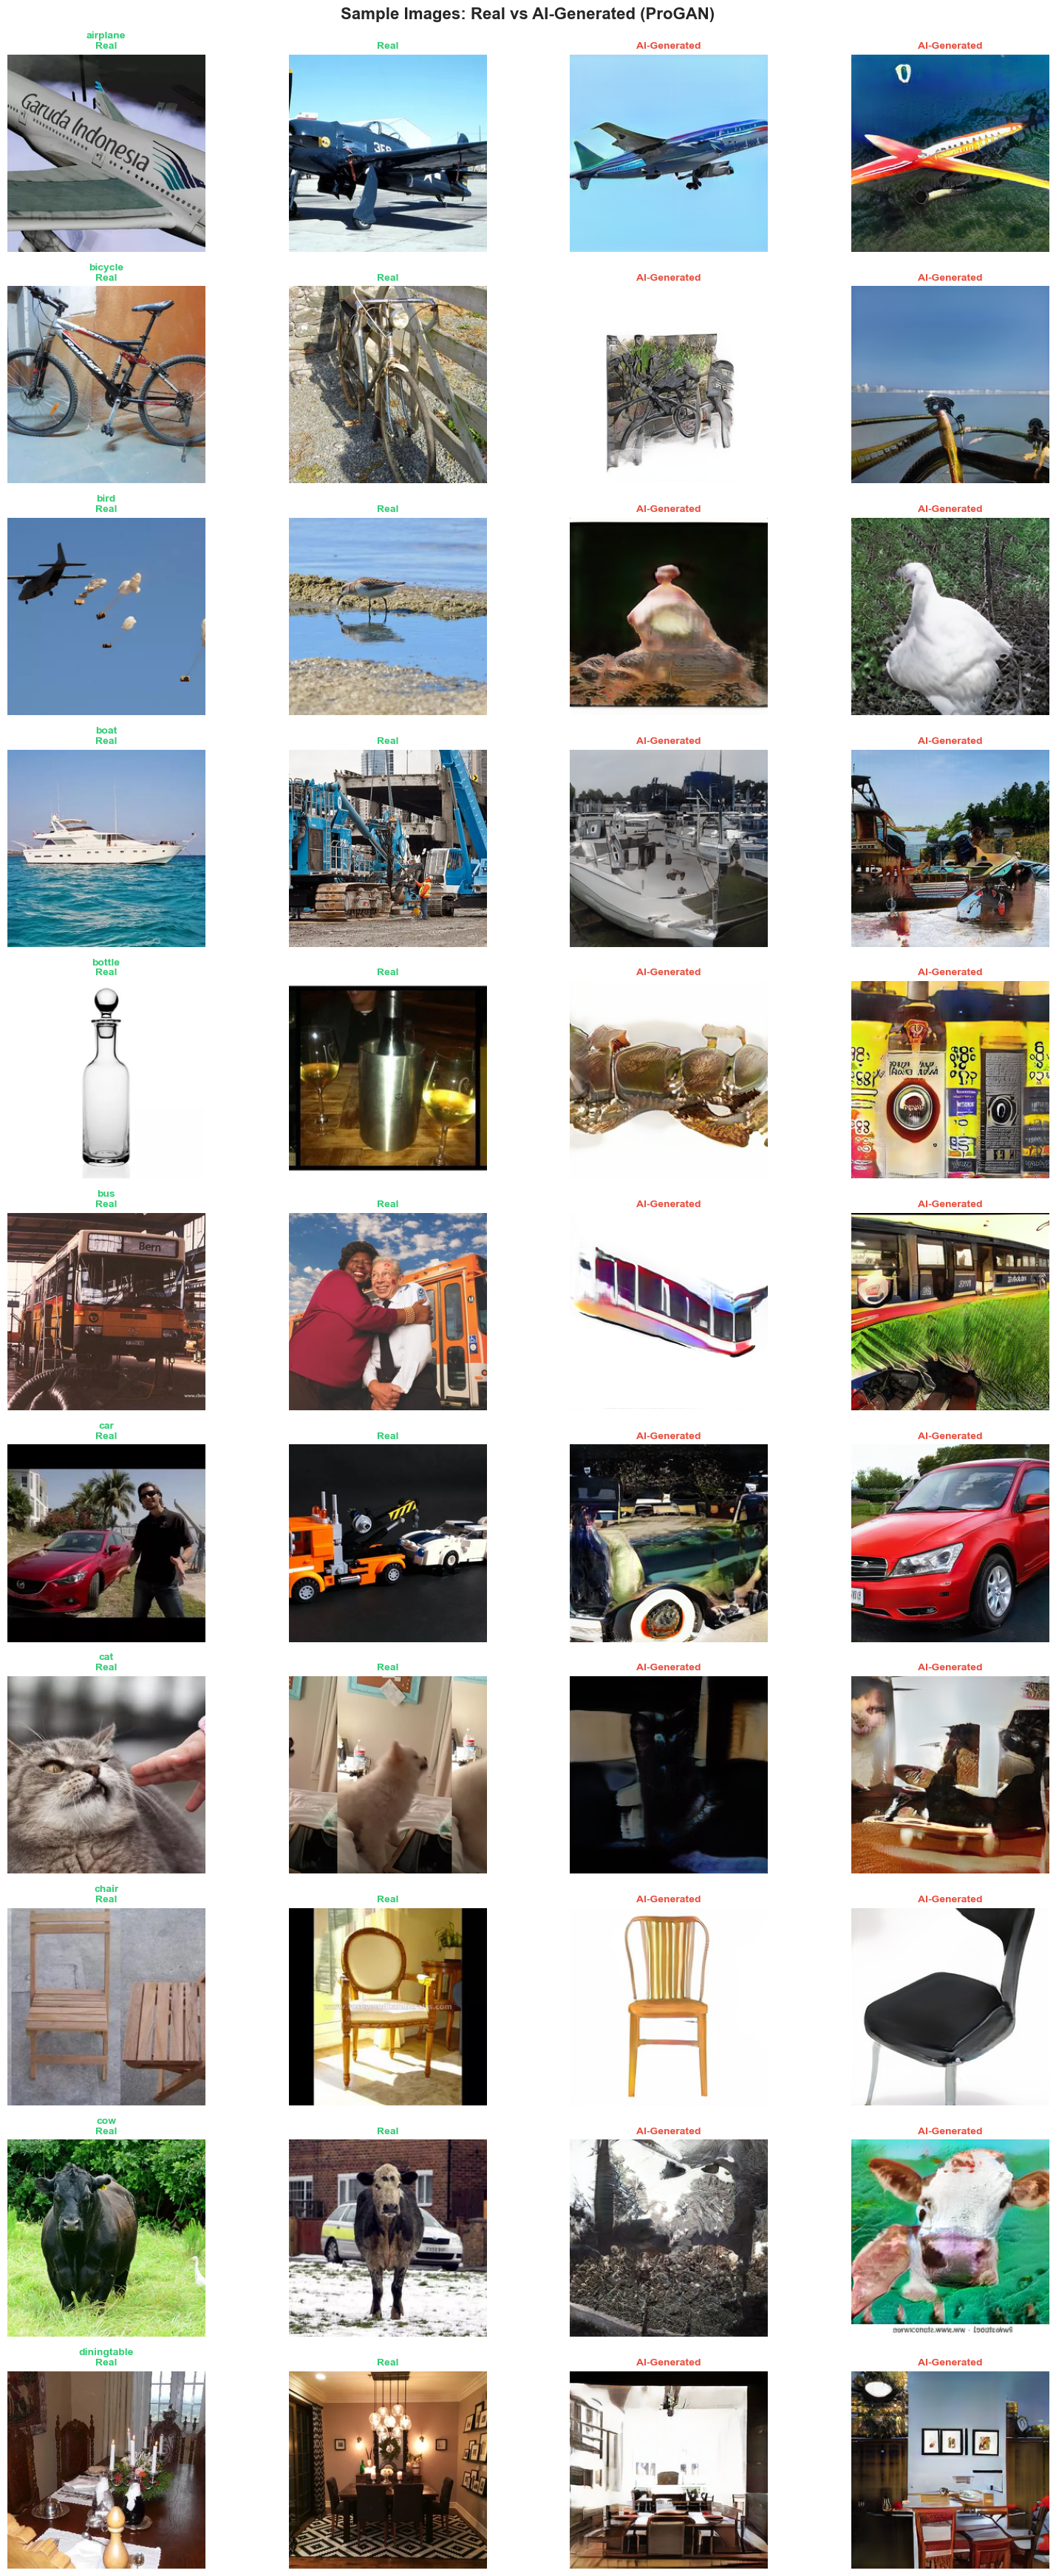

✓ Saved: eda_sample_images.png


In [17]:
# Display sample images from each category
fig, axes = plt.subplots(11, 4, figsize=(16, 35))
fig.suptitle('Sample Images: Real vs AI-Generated (ProGAN)', fontsize=16, fontweight='bold', y=0.995)

for idx, category in enumerate(categories):
    cat_path = data_dir / category
    
    # Get sample images
    real_images = list((cat_path / '0_real').glob('*.png'))[:2]
    fake_images = list((cat_path / '1_fake').glob('*.png'))[:2]
    
    # Display real images
    for i, img_path in enumerate(real_images):
        try:
            img = Image.open(img_path)
            axes[idx, i].imshow(img)
            axes[idx, i].axis('off')
            if i == 0:
                axes[idx, i].set_title(f'{category}\nReal', fontsize=10, fontweight='bold', color='#2ecc71')
            else:
                axes[idx, i].set_title('Real', fontsize=10, fontweight='bold', color='#2ecc71')
        except:
            axes[idx, i].axis('off')
    
    # Display fake images
    for i, img_path in enumerate(fake_images):
        try:
            img = Image.open(img_path)
            axes[idx, i+2].imshow(img)
            axes[idx, i+2].axis('off')
            axes[idx, i+2].set_title('AI-Generated', fontsize=10, fontweight='bold', color='#e74c3c')
        except:
            axes[idx, i+2].axis('off')

plt.tight_layout()
plt.savefig('eda_sample_images.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: eda_sample_images.png")


📏 Analyzing image dimensions (sampling 100 images per category)...


Processing categories:   0%|          | 0/11 [00:00<?, ?it/s]

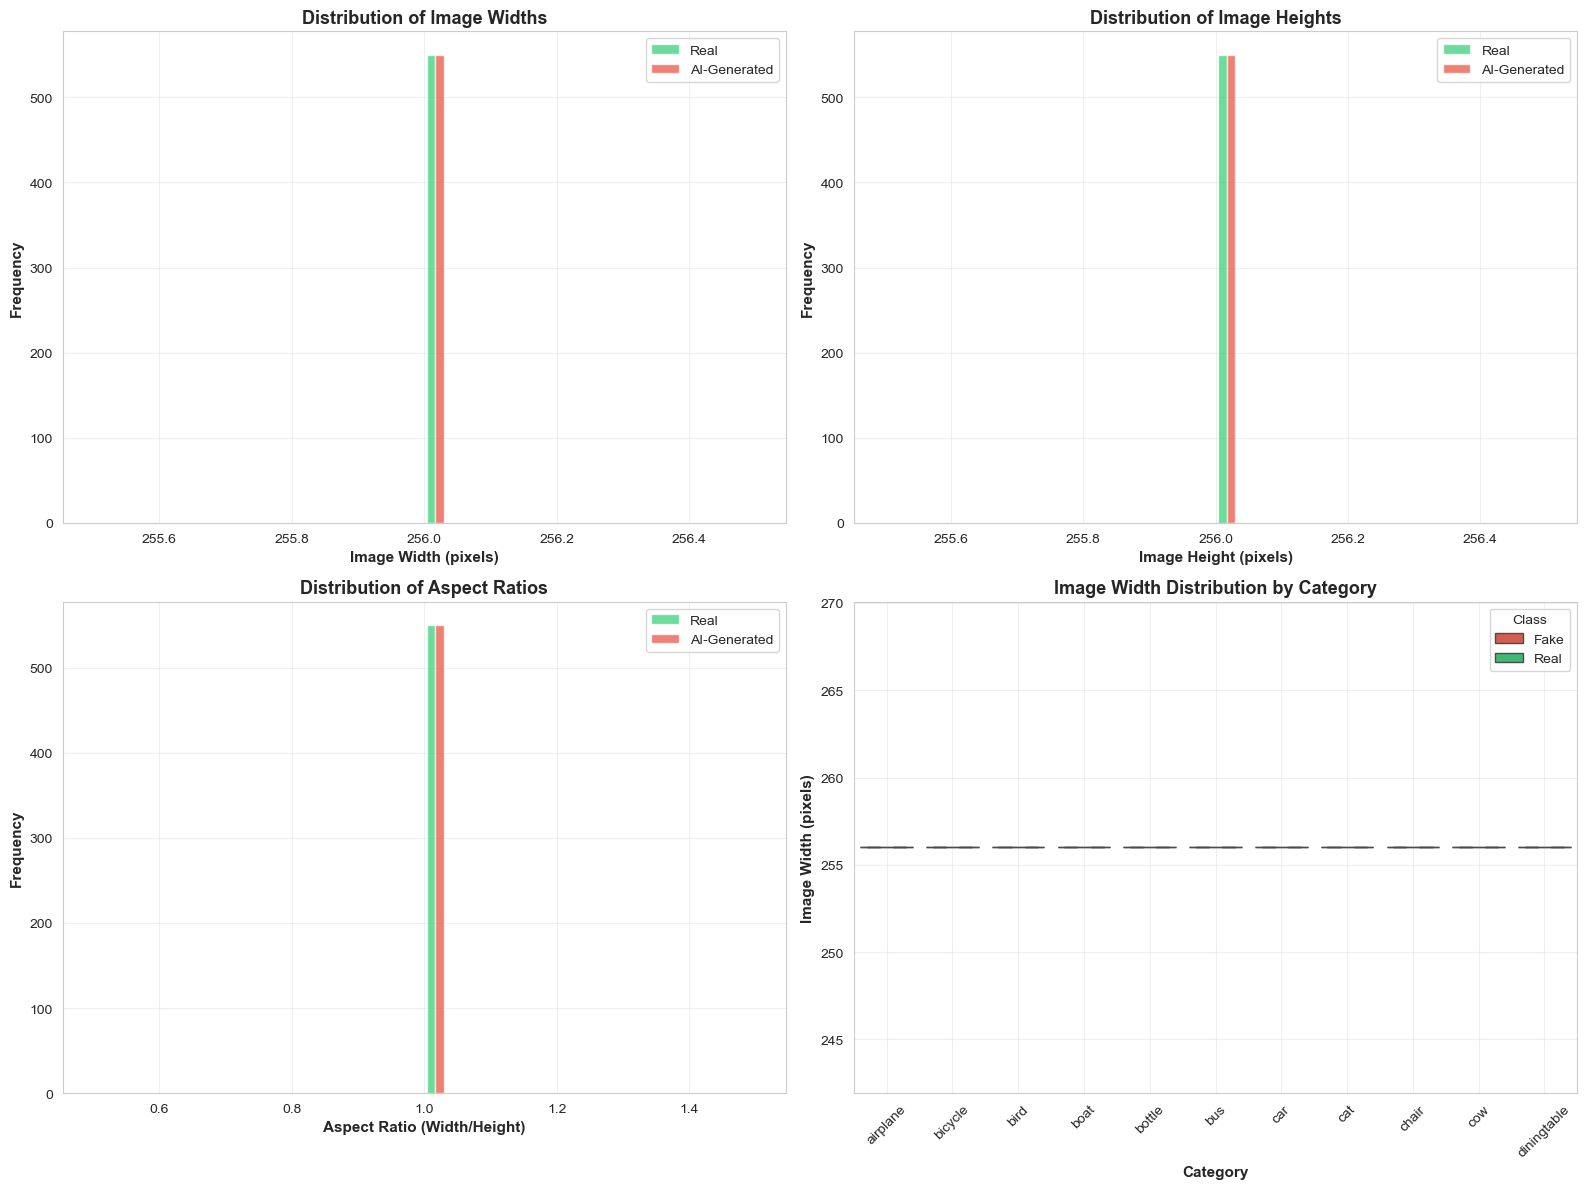

✓ Saved: eda_image_dimensions.png


In [18]:
# Analyze image dimensions
print("\n📏 Analyzing image dimensions (sampling 100 images per category)...")

dimension_data = []

for category in tqdm(categories, desc="Processing categories"):
    cat_path = data_dir / category
    
    # Sample images from both classes
    real_images = list((cat_path / '0_real').glob('*.png'))[:50]
    fake_images = list((cat_path / '1_fake').glob('*.png'))[:50]
    
    for img_path in real_images:
        try:
            with Image.open(img_path) as img:
                dimension_data.append({
                    'Category': category,
                    'Class': 'Real',
                    'Width': img.width,
                    'Height': img.height,
                    'Aspect_Ratio': img.width / img.height
                })
        except:
            pass
    
    for img_path in fake_images:
        try:
            with Image.open(img_path) as img:
                dimension_data.append({
                    'Category': category,
                    'Class': 'Fake',
                    'Width': img.width,
                    'Height': img.height,
                    'Aspect_Ratio': img.width / img.height
                })
        except:
            pass

df_dims = pd.DataFrame(dimension_data)

# Plot dimensions
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Width distribution
axes[0, 0].hist([df_dims[df_dims['Class']=='Real']['Width'], 
                  df_dims[df_dims['Class']=='Fake']['Width']], 
                label=['Real', 'AI-Generated'], bins=30, alpha=0.7, color=['#2ecc71', '#e74c3c'])
axes[0, 0].set_xlabel('Image Width (pixels)', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Distribution of Image Widths', fontsize=13, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Height distribution
axes[0, 1].hist([df_dims[df_dims['Class']=='Real']['Height'], 
                  df_dims[df_dims['Class']=='Fake']['Height']], 
                label=['Real', 'AI-Generated'], bins=30, alpha=0.7, color=['#2ecc71', '#e74c3c'])
axes[0, 1].set_xlabel('Image Height (pixels)', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Distribution of Image Heights', fontsize=13, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Aspect ratio distribution
axes[1, 0].hist([df_dims[df_dims['Class']=='Real']['Aspect_Ratio'], 
                  df_dims[df_dims['Class']=='Fake']['Aspect_Ratio']], 
                label=['Real', 'AI-Generated'], bins=30, alpha=0.7, color=['#2ecc71', '#e74c3c'])
axes[1, 0].set_xlabel('Aspect Ratio (Width/Height)', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Distribution of Aspect Ratios', fontsize=13, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Box plot by category
df_dims_sample = df_dims.groupby(['Category', 'Class']).sample(n=20, random_state=42)
sns.boxplot(data=df_dims_sample, x='Category', y='Width', hue='Class', ax=axes[1, 1], palette={'Real':'#2ecc71', 'Fake':'#e74c3c'})
axes[1, 1].set_xlabel('Category', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Image Width (pixels)', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Image Width Distribution by Category', fontsize=13, fontweight='bold')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('eda_image_dimensions.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: eda_image_dimensions.png")

In [19]:
print("\n" + "="*60)
print("📈 DIMENSION STATISTICS SUMMARY")
print("="*60)

summary = df_dims.groupby('Class').agg({
    'Width': ['mean', 'std', 'min', 'max'],
    'Height': ['mean', 'std', 'min', 'max'],
    'Aspect_Ratio': ['mean', 'std']
}).round(2)

print(summary)
print("="*60)


📈 DIMENSION STATISTICS SUMMARY
       Width                Height                Aspect_Ratio     
        mean  std  min  max   mean  std  min  max         mean  std
Class                                                              
Fake   256.0  0.0  256  256  256.0  0.0  256  256          1.0  0.0
Real   256.0  0.0  256  256  256.0  0.0  256  256          1.0  0.0


In [20]:
# Create summary report
report = f"""
EXPLORATORY DATA ANALYSIS REPORT
ProGAN Training Dataset
Generated: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}

{'='*60}
DATASET OVERVIEW
{'='*60}
Total Categories: {len(categories)}
Total Images: {df_stats['Total'].sum():,}
Real Images: {df_stats['Real Images'].sum():,}
AI-Generated Images: {df_stats['Fake Images'].sum():,}
Average Balance Ratio: {df_stats['Balance Ratio'].mean():.3f}

{'='*60}
CATEGORY BREAKDOWN
{'='*60}
{df_stats.to_string(index=False)}

{'='*60}
IMAGE DIMENSIONS (sampled)
{'='*60}
Real Images:
  - Average Width: {df_dims[df_dims['Class']=='Real']['Width'].mean():.1f}px
  - Average Height: {df_dims[df_dims['Class']=='Real']['Height'].mean():.1f}px
  - Average Aspect Ratio: {df_dims[df_dims['Class']=='Real']['Aspect_Ratio'].mean():.3f}

AI-Generated Images:
  - Average Width: {df_dims[df_dims['Class']=='Fake']['Width'].mean():.1f}px
  - Average Height: {df_dims[df_dims['Class']=='Fake']['Height'].mean():.1f}px
  - Average Aspect Ratio: {df_dims[df_dims['Class']=='Fake']['Aspect_Ratio'].mean():.3f}

{'='*60}
"""

# Save report
with open('eda_report.txt', 'w') as f:
    f.write(report)

print(report)
print("✓ Saved: eda_report.txt")


EXPLORATORY DATA ANALYSIS REPORT
ProGAN Training Dataset
Generated: 2025-11-26 18:01:28

DATASET OVERVIEW
Total Categories: 11
Total Images: 385,689
Real Images: 198,032
AI-Generated Images: 187,657
Average Balance Ratio: 0.948

CATEGORY BREAKDOWN
   Category  Real Images  Fake Images  Total  Balance Ratio
   airplane        18003        18003  36006       1.000000
    bicycle        18003        18003  36006       1.000000
       bird        18003        18003  36006       1.000000
       boat        18002        18003  36005       1.000056
     bottle        18003        18003  36006       1.000000
        bus        18003        18003  36006       1.000000
        car        18003        18003  36006       1.000000
        cat        18003        18003  36006       1.000000
      chair        18003        18003  36006       1.000000
        cow        18003        18003  36006       1.000000
diningtable        18003         7627  25630       0.423652

IMAGE DIMENSIONS (sampled)
Rea

In [16]:
import torch

# Check if CUDA is available
print(f"CUDA Available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"Number of GPUs: {torch.cuda.device_count()}")
    print(f"Current GPU: {torch.cuda.current_device()}")
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
    print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.2f} GB")
else:
    print("No GPU available - will use CPU")

CUDA Available: True
Number of GPUs: 1
Current GPU: 0
GPU Name: NVIDIA A40
GPU Memory: 44.43 GB


In [17]:
import os
from pathlib import Path

# Check current directory
print("Current directory:", os.getcwd())
print("\nChecking for category folders at root:")
categories = ['airplane', 'bicycle', 'bird', 'boat', 'bottle', 
              'bus', 'car', 'cat', 'chair', 'cow', 'diningtable']

for cat in categories:
    if Path(cat).exists():
        print(f"  ✓ {cat} exists at root")
        
print("\nChecking dataset/progan/train structure:")
if Path('dataset/progan/train').exists():
    train_contents = list(Path('dataset/progan/train').iterdir())
    print(f"  Contents: {[f.name for f in train_contents]}")
else:
    print("  ✗ dataset/progan/train does NOT exist")

print("\nChecking what's in 'progan' folder:")
if Path('progan').exists():
    progan_contents = list(Path('progan').iterdir())[:10]
    print(f"  Contents (first 10): {[f.name for f in progan_contents]}")

Current directory: /sfs/weka/scratch/rzc7ew/CNNDetection

Checking for category folders at root:

Checking dataset/progan/train structure:
  Contents: ['boat', 'chair', 'diningtable', 'cow', 'bicycle', 'bus', 'airplane', 'bird', 'car', 'cat', 'bottle']

Checking what's in 'progan' folder:


In [18]:
import os
from pathlib import Path

# Go to parent directory where the data actually is
os.chdir('/sfs/weka/scratch/rzc7ew')

print("Current directory:", os.getcwd())
print("\nChecking for category folders:")

categories = ['airplane', 'bicycle', 'bird', 'boat', 'bottle', 
              'bus', 'car', 'cat', 'chair', 'cow', 'diningtable']

for cat in categories:
    if Path(cat).exists():
        real = Path(cat) / '0_real'
        fake = Path(cat) / '1_fake'
        print(f"  ✓ {cat} - Real: {real.exists()}, Fake: {fake.exists()}")

Current directory: /sfs/weka/scratch/rzc7ew

Checking for category folders:


In [19]:
import shutil
from pathlib import Path

# Still in /sfs/weka/scratch/rzc7ew
categories = ['airplane', 'bicycle', 'bird', 'boat', 'bottle', 
              'bus', 'car', 'cat', 'chair', 'cow', 'diningtable']

# Create target directory
Path('CNNDetection/dataset/progan/train').mkdir(parents=True, exist_ok=True)

# Move each category
for category in categories:
    src = Path(category)
    dst = Path(f'CNNDetection/dataset/progan/train/{category}')
    
    if src.exists() and not dst.exists():
        print(f"Moving {category}...")
        shutil.move(str(src), str(dst))
        print(f"  ✓ Moved")
    elif dst.exists():
        print(f"  ✓ {category} already in place")

print("\n✓ All data moved!")

  ✓ airplane already in place
  ✓ bicycle already in place
  ✓ bird already in place
  ✓ boat already in place
  ✓ bottle already in place
  ✓ bus already in place
  ✓ car already in place
  ✓ cat already in place
  ✓ chair already in place
  ✓ cow already in place
  ✓ diningtable already in place

✓ All data moved!


In [23]:
from pathlib import Path

# Check what's actually in val folder
print("Checking val folder contents:")
val_path = Path('CNNDetection/dataset/progan/val')
if val_path.exists():
    val_contents = [f.name for f in val_path.iterdir() if f.is_dir()]
    print(f"Val has: {val_contents}")
else:
    print("Val folder doesn't exist!")

print("\nChecking train folder contents:")
train_path = Path('CNNDetection/dataset/progan/train')
train_contents = [f.name for f in train_path.iterdir() if f.is_dir()]
print(f"Train has: {train_contents}")

Checking val folder contents:
Val has: ['bicycle', 'airplane', 'bird', 'boat']

Checking train folder contents:
Train has: ['boat', 'chair', 'diningtable', 'cow', 'bicycle', 'bus', 'airplane', 'bird', 'car', 'cat', 'bottle']


In [24]:
import shutil
from pathlib import Path

categories = ['airplane', 'bicycle', 'bird', 'boat', 'bottle', 
              'bus', 'car', 'cat', 'chair', 'cow', 'diningtable']

# Create val directory
Path('CNNDetection/dataset/progan/val').mkdir(parents=True, exist_ok=True)

# Copy each category individually
for category in categories:
    src = Path(f'CNNDetection/dataset/progan/train/{category}')
    dst = Path(f'CNNDetection/dataset/progan/val/{category}')
    
    if src.exists():
        if dst.exists():
            shutil.rmtree(dst)  # Remove if exists
        shutil.copytree(src, dst)
        print(f"✓ Copied {category}")

print("\n✓ All categories copied!")

✓ Copied airplane
✓ Copied bicycle
✓ Copied bird
✓ Copied boat
✓ Copied bottle
✓ Copied bus
✓ Copied car
✓ Copied cat
✓ Copied chair
✓ Copied cow
✓ Copied diningtable

✓ All categories copied!


In [9]:
import os
# Go to CNNDetection folder (NOT the dataset folder)
os.chdir('/sfs/weka/scratch/rzc7ew/CNNDetection')

# Verify
print("Current directory:", os.getcwd())
print("train.py exists:", os.path.exists('train.py'))
print("Data exists:", os.path.exists('dataset/progan/train'))

Current directory: /sfs/weka/scratch/rzc7ew/CNNDetection
train.py exists: True
Data exists: True


In [12]:
import os
os.chdir('/sfs/weka/scratch/rzc7ew/CNNDetection')

# Fix train.py to remove double slashes
with open('train.py', 'r') as f:
    content = f.read()

content = content.replace(
    "opt.dataroot = '{}/{}/'.format(opt.dataroot, opt.train_split)",
    "opt.dataroot = '{}/{}'.format(opt.dataroot, opt.train_split)"
)
content = content.replace(
    "val_opt.dataroot = '{}/{}/'.format(val_opt.dataroot, val_opt.val_split)",
    "val_opt.dataroot = '{}/{}'.format(val_opt.dataroot, val_opt.val_split)"
)

with open('train.py', 'w') as f:
    f.write(content)

print("✓ Fixed train.py!")

✓ Fixed train.py!


In [2]:
import os
from pathlib import Path

# Check both locations
locations = [
    '/sfs/weka/scratch/rzc7ew/CNNDetection/dataset/progan/train',
    '/scratch/rzc7ew/CNNDetection/dataset/progan/train'
]

for loc in locations:
    if Path(loc).exists():
        count = 0
        categories = ['airplane', 'bicycle', 'bird', 'boat', 'bottle', 
                      'bus', 'car', 'cat', 'chair', 'cow', 'diningtable']
        for cat in categories:
            cat_path = Path(loc) / cat
            if cat_path.exists():
                n_real = len(list((cat_path / '0_real').glob('*.*')))
                n_fake = len(list((cat_path / '1_fake').glob('*.*')))
                count += n_real + n_fake
        print(f"{loc}: {count} images")
    else:
        print(f"{loc}: DOES NOT EXIST")

/sfs/weka/scratch/rzc7ew/CNNDetection/dataset/progan/train: 385689 images
/scratch/rzc7ew/CNNDetection/dataset/progan/train: 385689 images


In [7]:
# Change to the directory with FULL data
os.chdir('/scratch/rzc7ew/CNNDetection')  # Use whichever path has the full data

!python train.py \
    --name progan_resnet50_10epochs \
    --dataroot ./dataset/progan \
    --classes airplane,bicycle,bird,boat,bottle,bus,car,cat,chair,cow,diningtable \
    --batch_size 1024 \
    --niter 3 \
    --gpu_ids 0,1 \
    --save_epoch_freq 5 \
    --loss_freq 100 \
    --num_threads 2

----------------- Options ---------------
                     arch: res50                         
               batch_size: 1024                          	[default: 64]
                    beta1: 0.9                           
                blur_prob: 0                             
                 blur_sig: 0.5                           
          checkpoints_dir: ./checkpoints                 
                class_bal: False                         
                  classes: airplane,bicycle,bird,boat,bottle,bus,car,cat,chair,cow,diningtable	[default: ]
           continue_train: False                         
                 cropSize: 224                           
                 data_aug: False                         
                 dataroot: ./dataset/progan              	[default: ./dataset/]
          earlystop_epoch: 5                             
                    epoch: latest                        
              epoch_count: 1                             
   